In [1]:
# face detection with mtcnn on a photograph
import os
import cv2
import logging
import tensorflow
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Circle
from matplotlib.patches import Rectangle

tensorflow.get_logger().setLevel(logging.ERROR)

# load images from received folder
def load_images_from_folder(folder):
    images = []
    
    for filename in os.listdir(folder):
        path_image = os.path.join(folder, filename)
        img = cv2.imread(path_image)
        
        if img is not None:
            images.append(path_image)
            
    return images

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    # load and plot the image
    data = pyplot.imread(filename)
    pyplot.axis('off')
    pyplot.imshow(data)
    # get the context for drawing boxes
    context = pyplot.gca()
    
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        context.add_patch(rect)
        
        # draw the dots
        for _, value in result['keypoints'].items():
            # create and draw dot
            dot = Circle(value, radius=2, color='red')
            context.add_patch(dot)
 
    # save the plot
    pyplot.savefig('%s faces.jpg' % (filename[:filename.rindex('.')]))
    # show the plot
    pyplot.show()
    
# detect faces in the image with MTCNN
def detect(filename):
    # load image from file
    pixels = pyplot.imread(filename)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    faces = detector.detect_faces(pixels)
    # display faces on the original image
    draw_image_with_boxes(filename, faces)

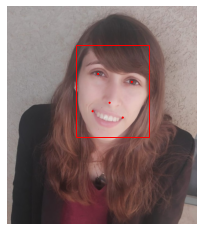

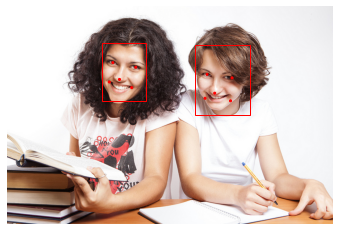

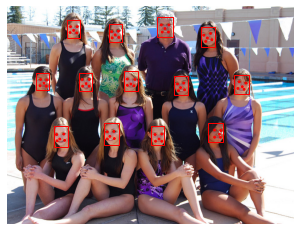

In [2]:
## Main
folder = '.\data'
folderlen = len(folder) + 1
# define filenames
filenames = load_images_from_folder(folder)

# detect faces in the image with MTCNN
for i in range(len(filenames)):
    detect(filenames[i])